#PROJECT : Perform Exploratory Data Analysis on Elon Musk's Tweets

###Objectives
To Perform Exploratory Data Analysis on the dataset given to you. Major feature engineering techniques and data visualization should be applied to the dataset to draw useful and necessary inferences






---






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## DATASET ANALYSIS

To load the dataset and printout head() i.e first 5 columns to know about what kind of data is there.



*   have a glance of data columns

*   check the data type in every column


*   check NAN value






In [ ]:
df=pd.read_csv('Elon.csv')
df.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

In [ ]:
df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              12562
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          12152
video                  0
thumbnail          11770
near               12562
geo                12562
source             12562
user_rt_id         12562
user_rt            12562
retweet_id         12562
reply_to               0
retweet_date       12562
translate          12562
trans_src          12562
trans_dest         12562
dtype: int64

#Data Cleaning

---




*   From what it is observed , the columns "id" , "conversation_id" , "user_rt_id" ,
  "user_rt",  "retweet_id" are irrelevant related to what we are trying to find out so we are dropping those columns . 


*   Also we are popping the "name" column as we already know who has made the post i.e. Elon Musk







In [ ]:
dff=df #alt variable for data dropping is used so as to recover any data loss


df.head()



,created_at,date,time,timezone,tweet,mentions,urls,photos,replies_count,retweets_count,...,thumbnail,near,geo,source,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,Love this beautiful shot,[],[],[],2464,1517,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb...",NaN,NaN,NaN,NaN
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,The art In Cyberpunk is incredible,[],[],[],8437,10329,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,@itsALLrisky 🤣🤣,[],[],[],446,542,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...",NaN,NaN,NaN,NaN




*   Data popped for previous items now popping columns full of null values




In [ ]:
df.isnull().sum()

created_at            0
date                  0
time                  0
timezone              0
tweet                 0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url         12152
video                 0
thumbnail         11770
near              12562
geo               12562
source            12562
retweet_id        12562
reply_to              0
retweet_date      12562
translate         12562
trans_src         12562
trans_dest        12562
dtype: int64

In [ ]:
df.pop("geo")
df.pop("near")
df.pop("source")
df.pop("retweet_id")
df.pop("trans_src")


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
12557   NaN
12558   NaN
12559   NaN
12560   NaN
12561   NaN
Name: trans_src, Length: 12562, dtype: float64

In [ ]:
df.pop("retweet_date")
df.pop("trans_src")
df.pop("trans_dest")
df.pop("translate")
df.head()


,created_at,date,time,timezone,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,@vincent13031925 For now. Costs are decreasing...,[],[],[],640,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,False,NaN,0,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,Love this beautiful shot,[],[],[],2464,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,False,NaN,0,NaN,[]
2,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,[],[],[],115,48,1380,[],[],https://twitter.com/elonmusk/status/1381258144...,False,NaN,0,NaN,"[{'screen_name': 'agnostoxxx', 'name': 'Shrubb..."
3,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,The art In Cyberpunk is incredible,[],[],[],8437,10329,228144,[],[],https://twitter.com/elonmusk/status/1381221447...,False,NaN,0,NaN,[]
4,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,@itsALLrisky 🤣🤣,[],[],[],446,542,7489,[],[],https://twitter.com/elonmusk/status/1381129584...,False,NaN,0,NaN,"[{'screen_name': 'itsALLrisky', 'name': '💸💸💸',..."


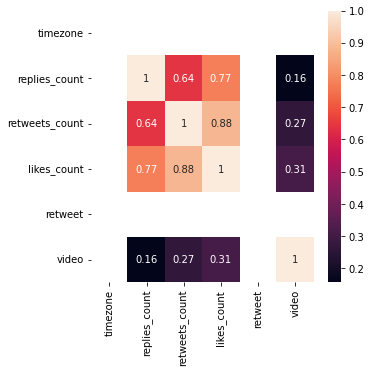

In [ ]:
dfp=pd.read_csv('Elox.csv')#importing a copy of the csv file for heatmap comparison

corr=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,annot=True) 



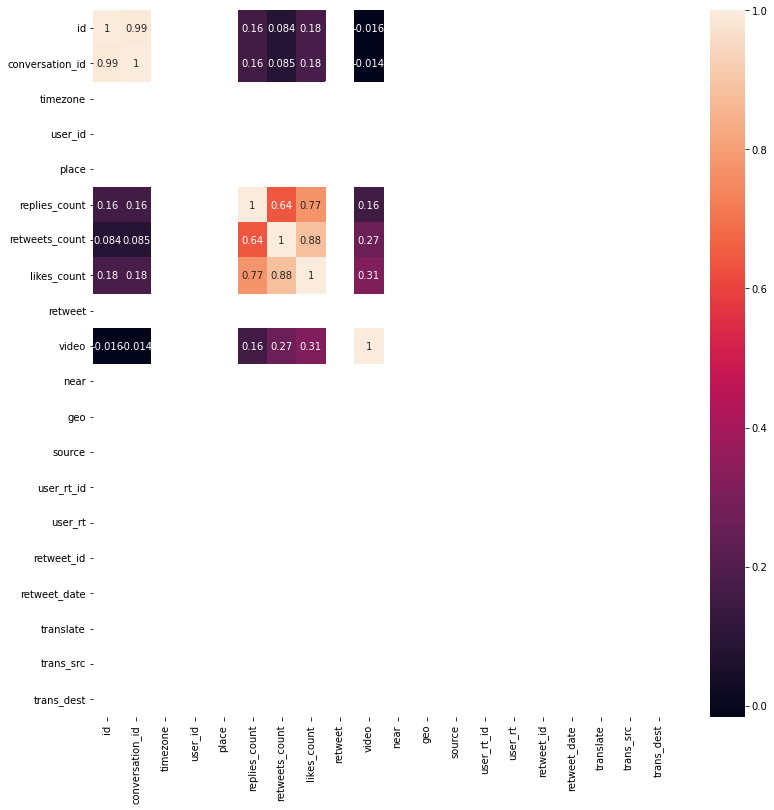

In [ ]:
df.pop('timezone')#not correlated to anything relevant or anything at all
corr=dfp.corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True)

## Heatmap Comparison
Comparing the two maps between a clean and an unclean dataset we find that the deletion of columns had no effect whatsoever on the remaining values and does the dataset is clean without any variation being there.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      12562 non-null  object
 1   date            12562 non-null  object
 2   time            12562 non-null  object
 3   tweet           12562 non-null  object
 4   mentions        12562 non-null  object
 5   urls            12562 non-null  object
 6   photos          12562 non-null  object
 7   replies_count   12562 non-null  int64 
 8   retweets_count  12562 non-null  int64 
 9   likes_count     12562 non-null  int64 
 10  hashtags        12562 non-null  object
 11  cashtags        12562 non-null  object
 12  link            12562 non-null  object
 13  retweet         12562 non-null  bool  
 14  quote_url       410 non-null    object
 15  video           12562 non-null  int64 
 16  thumbnail       792 non-null    object
 17  reply_to        12562 non-null  object
dtypes: boo

#Exploratory Data Analysis

---



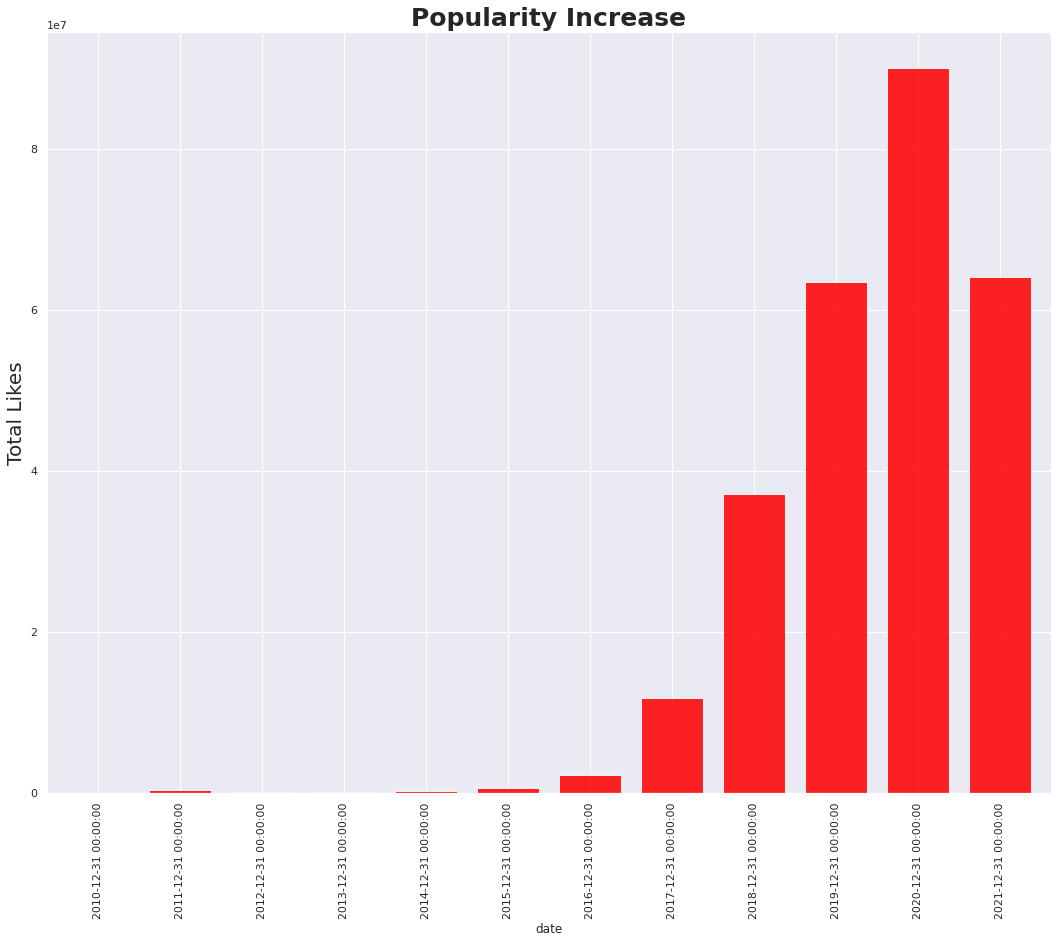

In [58]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(18,14))
plt.ylabel('Total Likes',fontsize=20)
plt.title('Popularity Increase',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1Y'))['likes_count'].sum()
dt.plot(kind='bar',color='red',alpha=0.86,width=0.75)


##Inferences 


*   The popularity of Elon Musk has risen during the covid era with the rise of Tesla and Meme Culture.



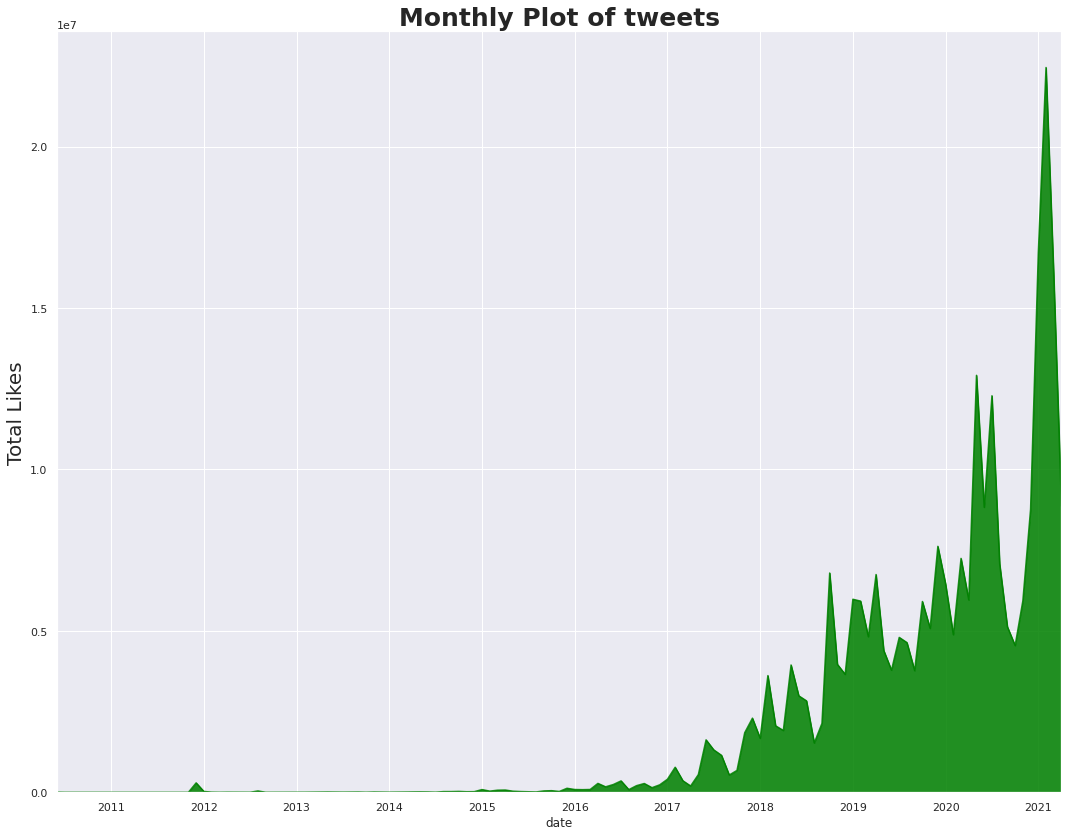

In [68]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(18,14))
plt.ylabel('Total Likes',fontsize=20)
plt.title('Monthly Plot of tweets',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1M'))['likes_count'].sum()
dt.plot(kind='area',color='green',alpha=0.86)

In [65]:
df['tweet_amount']="1"
df['tweet_amount']=df['tweet_amount'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      12562 non-null  object        
 1   date            12562 non-null  datetime64[ns]
 2   time            12562 non-null  object        
 3   tweet           12562 non-null  object        
 4   mentions        12562 non-null  object        
 5   urls            12562 non-null  object        
 6   photos          12562 non-null  object        
 7   replies_count   12562 non-null  int64         
 8   retweets_count  12562 non-null  int64         
 9   likes_count     12562 non-null  int64         
 10  hashtags        12562 non-null  object        
 11  cashtags        12562 non-null  object        
 12  link            12562 non-null  object        
 13  retweet         12562 non-null  bool          
 14  quote_url       410 non-null    object        
 15  vi

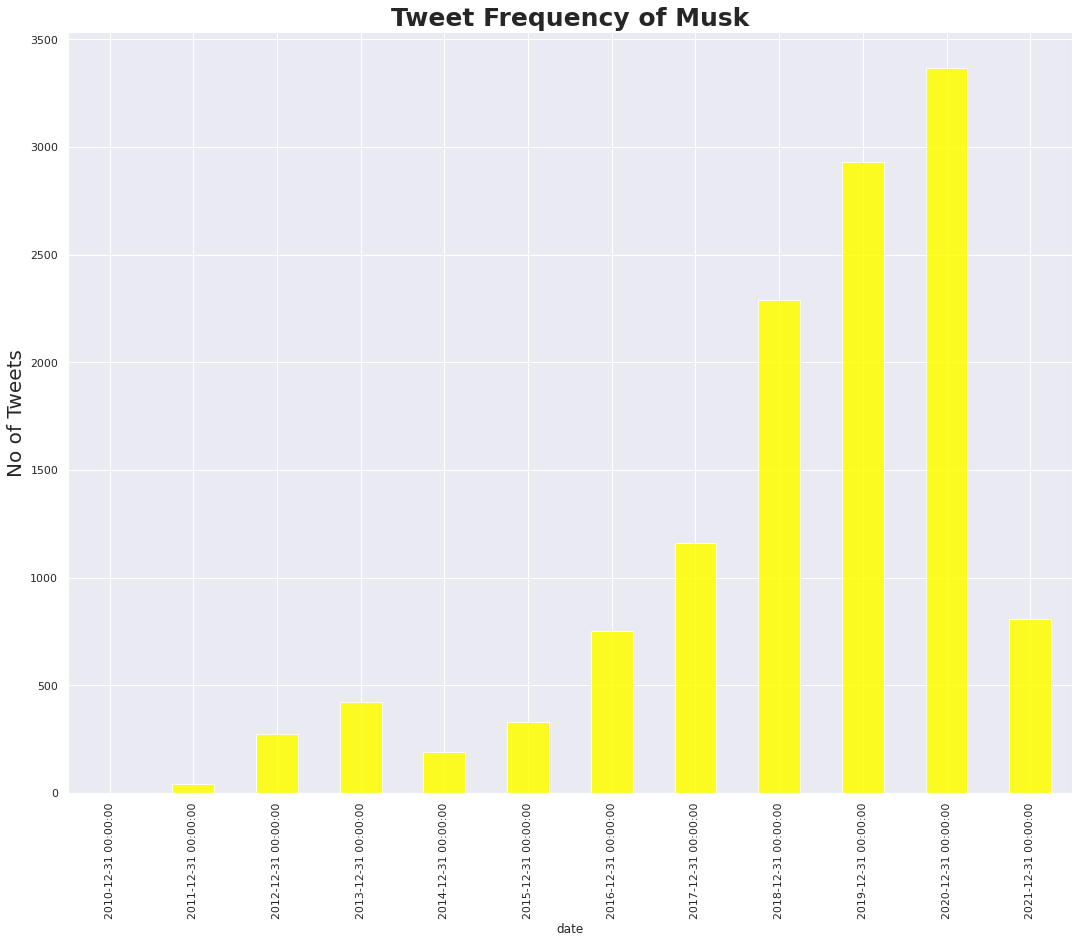

In [67]:
plt.figure(figsize=(18,14))
plt.ylabel('No of Tweets',fontsize=20)
plt.title('Tweet Frequency of Musk',fontsize=25,fontweight='bold')
sns.set()
dt=df.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='yellow',alpha=0.86)

#Inference


*   The Most amount of tweets made by Musk was in 2020 , that is , during the major covid lockdowns and this gained him a lot of popularity if we observe the popularity increase graph with this one. 
*   Elon Musk made a significantly less amount of tweets in 2021 proceeding the lockdown period , which could imply that 2020 was strategic in improving his popularity to push Tesla and Bitcoin values so that he could acquire profit and e stopped once they went stagnant.



---




####Here we have created a variable "twitter_tweet" which stores the tweets which have mentioned the substring 'twitter' this is done to gather further information of Elon Musk's Twitter acquisition back in April 2022

In [72]:
twitter_tweet=df.loc[df['tweet'].str.contains("twitter", case=False)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_at      12562 non-null  object        
 1   date            12562 non-null  datetime64[ns]
 2   time            12562 non-null  object        
 3   tweet           12562 non-null  object        
 4   mentions        12562 non-null  object        
 5   urls            12562 non-null  object        
 6   photos          12562 non-null  object        
 7   replies_count   12562 non-null  int64         
 8   retweets_count  12562 non-null  int64         
 9   likes_count     12562 non-null  int64         
 10  hashtags        12562 non-null  object        
 11  cashtags        12562 non-null  object        
 12  link            12562 non-null  object        
 13  retweet         12562 non-null  bool          
 14  quote_url       410 non-null    object        
 15  vi

#Analysis Based on tweets



In [73]:
twitter_tweet.head()#printing the first 5 values in the newly acquired twitter specific dataset of ours.

,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount
139,2021-03-27 05:16:42 EET,2021-03-27,05:16:42,@RationalEtienne @TwitterSupport @jack This ap...,[],[],[],261,186,3313,[],[],https://twitter.com/elonmusk/status/1375647941...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'T...",1
188,2021-03-20 17:52:39 EET,2021-03-20,17:52:39,@Erdayastronaut @Twitter @TwitterComms @verifi...,[],[],[],536,340,11868,[],[],https://twitter.com/elonmusk/status/1373301467...,False,NaN,0,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",1
534,2021-02-02 10:45:48 EET,2021-02-02,10:45:48,Off Twitter for a while,[],[],[],34509,24830,540168,[],[],https://twitter.com/elonmusk/status/1356524205...,False,NaN,0,NaN,[],1
1610,2020-09-21 02:21:18 EEST,2020-09-21,02:21:18,"@ID_AA_Carmack For Dojo, we’re betting on FP16...",[],[],[],91,126,2678,[],[],https://twitter.com/elonmusk/status/1307822172...,False,NaN,0,NaN,"[{'screen_name': 'ID_AA_Carmack', 'name': 'Joh...",1
1968,2020-08-08 22:51:49 EEST,2020-08-08,22:51:49,@RationalEtienne @BernieSanders I wonder if he...,[],[],[],320,133,4007,[],[],https://twitter.com/elonmusk/status/1292186775...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'P...",1


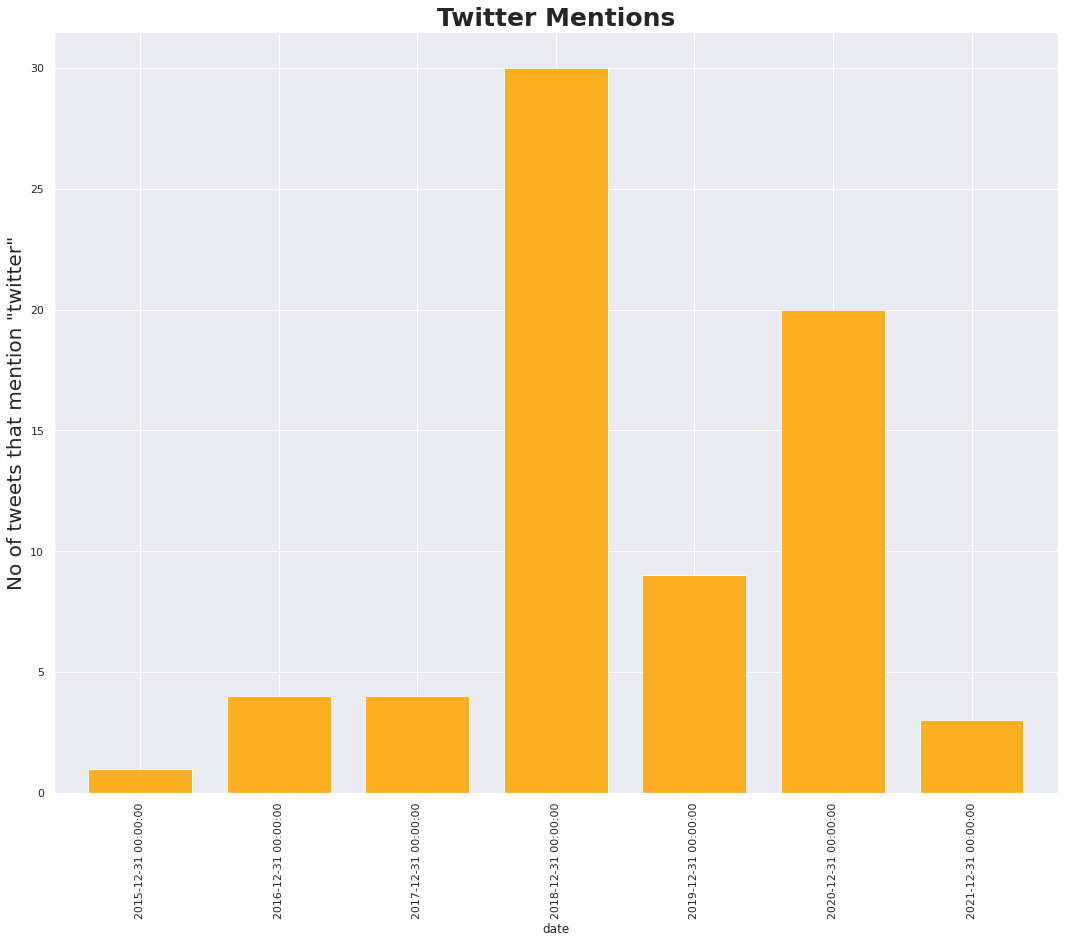

In [76]:
df.date=pd.to_datetime(df.date)
plt.figure(figsize=(18,14))
plt.ylabel('No of tweets that mention "twitter"',fontsize=20)
plt.title('Twitter Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=twitter_tweet.groupby(pd.Grouper(key='date',freq='1Y'))['tweet_amount'].sum()
dt.plot(kind='bar',color='orange',alpha=0.86,width=0.75)

##Inference

*  Musk mentioned twitter most in 2018 and the least in 2021 , we exclude the data of 2015 as its mostly irrelevant compared to the other data we have got.



In [85]:
twitter_tweet['date_specific']=twitter_tweet.loc[:, 'date']
twitter_tweet['date_specific']=twitter_tweet['date_specific'].astype(str)
tweet_2021=twitter_tweet.loc[twitter_tweet['date_specific'].str.contains("2021", case=False)]
tweet_2021.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,created_at,date,time,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to,tweet_amount,date_specific
139,2021-03-27 05:16:42 EET,2021-03-27,05:16:42,@RationalEtienne @TwitterSupport @jack This ap...,[],[],[],261,186,3313,[],[],https://twitter.com/elonmusk/status/1375647941...,False,NaN,0,NaN,"[{'screen_name': 'RationalEtienne', 'name': 'T...",1,2021-03-27
188,2021-03-20 17:52:39 EET,2021-03-20,17:52:39,@Erdayastronaut @Twitter @TwitterComms @verifi...,[],[],[],536,340,11868,[],[],https://twitter.com/elonmusk/status/1373301467...,False,NaN,0,NaN,"[{'screen_name': 'Erdayastronaut', 'name': 'Ev...",1,2021-03-20
534,2021-02-02 10:45:48 EET,2021-02-02,10:45:48,Off Twitter for a while,[],[],[],34509,24830,540168,[],[],https://twitter.com/elonmusk/status/1356524205...,False,NaN,0,NaN,[],1,2021-02-02


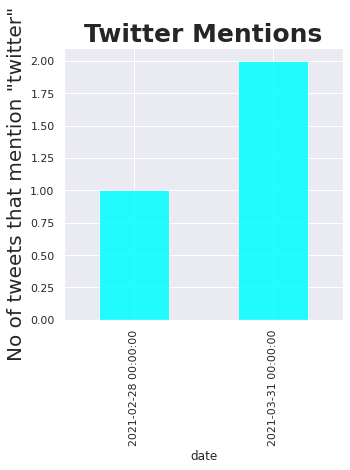

In [91]:

plt.figure(figsize=(5,5))
plt.ylabel('No of tweets that mention "twitter"',fontsize=20)
plt.title('Twitter Mentions',fontsize=25,fontweight='bold')
sns.set()
dt=tweet_2021.groupby(pd.Grouper(key='date',freq='1M'))['tweet_amount'].sum()
dt.plot(kind='bar',color='cyan',alpha=0.86,width=0.5)

##Inference



*   According to the given dataset till april 2021 , Musk made 3 tweets regarding twitter one in february and one 2 in march . The one in Feb mentioned he was going off twitter for a while. Whereas the rest 2 were about the shadowbans of @Erdayastronaut and "The Pope of Muskanity" (@RationalEtienne). Musk complaining to twitter about them in both his march tweets.This might indicate his growing agitation towards twitter's ban policies.






#Analysis on Musk's Bitcoin Endeavours

---

